In [7]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import ipywidgets as widgets
from IPython.display import display

In [8]:
# Parámetros de la grabación
fs = 44100  # Frecuencia de muestreo
duration = 10  # Duración de la señal 

In [9]:
# Grabar la señal de voz
print("Comienza la grabación...")
voz = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
sd.wait()
print("Grabación completa.")

# Guardar la señal grabada para futuras referencias (opcional)
np.save('voz.npy', voz)

Comienza la grabación...
Grabación completa.


In [16]:
# Cargar la señal grabada (si no se grabó en la sesión actual)
voz = np.load('voz.npy')

# Función para reproducir la señal de voz
def play_audio():
    sd.play(voz, fs)
    sd.wait()

# Crear  botón de "Play"
play_button = widgets.Button(description="Play")

# Asignar la función al botón
play_button.on_click(lambda x: play_audio())

# Mostrar el botón
display(play_button)

Button(description='Play', style=ButtonStyle())

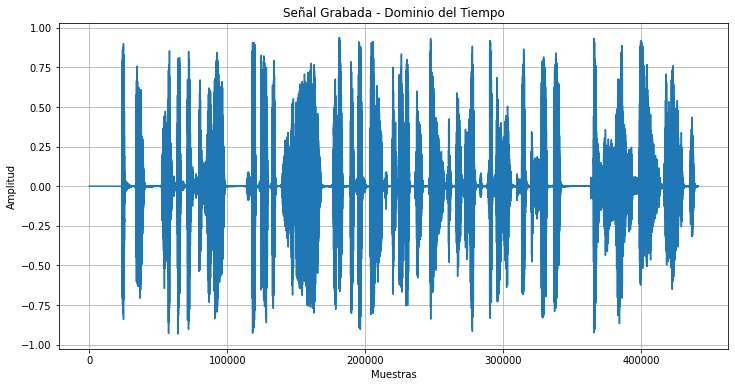

In [11]:
# Visualización en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(voz)
plt.title('Señal Grabada - Dominio del Tiempo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

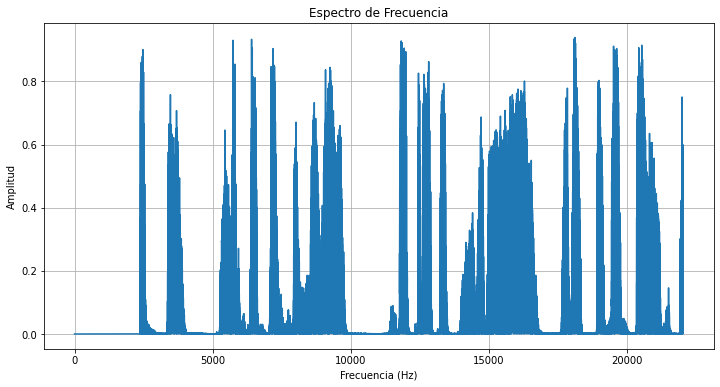

In [15]:
# Cálculo del espectro de frecuencia
n = len(voz)
freq = fftfreq(n, d=1/fs)
spectrum = np.abs(fft(voz))

# Visualización en el dominio de la frecuencia
plt.figure(figsize=(12, 6))
plt.plot(freq[:n//2], spectrum[:n//2])  # Solo graficamos hasta la mitad (frecuencias positivas)
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()